In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Task 1: Generate a dataset of points

In [62]:
def gen_clusters(m1,m2,c1,c2):
    mean1 = [m1,m1]
    cov1 = [[c1,0],[0,c1]]
    data1 = np.random.multivariate_normal(mean1,cov1,100)
    
    mean2 = [m2,m2]
    cov2 = [[c2,0],[0,c2]]
    data2 = np.random.multivariate_normal(mean2,cov2,100)
    return np.round(data1,4),np.round(data2,4)

In [63]:
data1, data2 = gen_clusters(0,20,10,10)

train_data1 = data1[:80]
test_data1 = data1[80:100]
train_data2 = data2[:80]
test_data2 = data2[80:100]

train_data = np.append(train_data1, train_data2,0)
test_data = np.append(test_data1, test_data2,0)

train_y = np.append(np.ones(80), np.ones(80)*(-1.0))
test_y = np.append(np.ones(20), np.ones(20)*(-1.0))

#### Show figures of traing data and test data

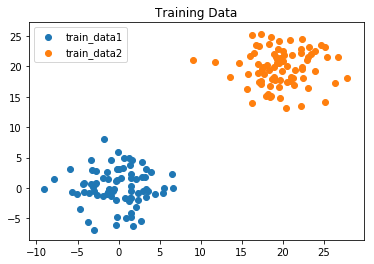

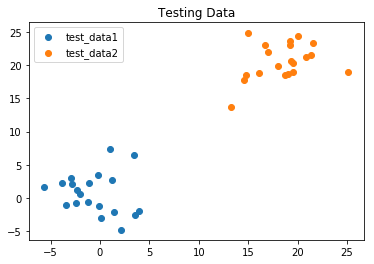

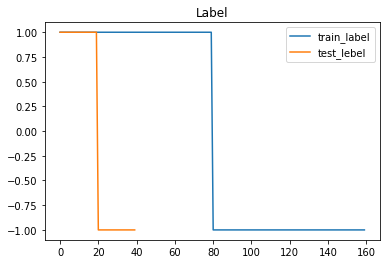

In [64]:
plt.title('Training Data')
plt.scatter(train_data1[:,0],train_data1[:,1], label='train_data1')
plt.scatter(train_data2[:,0],train_data2[:,1], label='train_data2')
plt.legend()
plt.show()
plt.title('Testing Data')
plt.scatter(test_data1[:,0],test_data1[:,1], label='test_data1')
plt.scatter(test_data2[:,0],test_data2[:,1], label='test_data2')
plt.legend()
plt.show()
plt.title('Label')
plt.plot(train_y, label='train_label')
plt.plot(test_y, label='test_lebel')
plt.legend()
plt.show()

### Task 2: Implement the perceptron

In [65]:
class Perceptron(object):

    def __init__(self, n_inputs, max_epochs=1e2, learning_rate=1e-2):
        """
        Initializes perceptron object.
        Args:
            n_inputs: number of inputs.
            max_epochs: maximum number of training cycles.
            learning_rate: magnitude of weight changes at each training cycle
        """
        self.n_inputs = n_inputs
        self.max_epochs = max_epochs
        self.learning_rate = learning_rate
        self.w = np.zeros(n_inputs)
        
    def forward(self, _input):
        """
        Predict label from input 
        Args:
            input: array of dimension equal to n_inputs.
        """

        z = np.dot(_input, self.w)
         
        if z > 0:
            label = 1
        else:
            label = -1
       
        return label
        
    def train(self, training_inputs, labels):
        """
        Train the perceptron
        Args:
            training_inputs: list of numpy arrays of training points.
            labels: arrays of expected output value for the corresponding point in training_inputs.
        """
        for epoch in range(int(self.max_epochs)):
            randnum = random.randint(0,100)
            np.random.seed(randnum)
            np.random.shuffle(training_inputs)
            np.random.seed(randnum)
            np.random.shuffle(labels)
            
            for i in range(len(training_inputs)):
            
                label = self.forward(training_inputs[i])
            
                if labels[i]*label <= 0:
                    self.w = self.w + self.learning_rate*labels[i]*training_inputs[i]
                    
        return self.w
            
            

### Task 3: Train the perceptron on the training data (160 points) and test in on the remaining 40 test points

In [66]:
p = Perceptron(2)
p.train(train_data,train_y)

array([-0.208039, -0.150906])

#### Test the accuracy of the testing data:
In the figure shown below, the green points means the test data which are correctly predicted.

Accuracy:82.5%


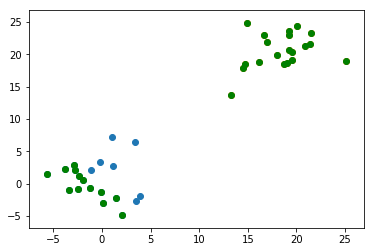

In [68]:
correct_counter = 0
correct_points = []
for i in range(len(test_data)):
    predict_label = p.forward(test_data[i])
    if test_y[i] == predict_label:
        correct_counter += 1
        correct_points.append(test_data[i])

rate = correct_counter / len(test_data)
print("Accuracy:"+str(rate*100)+"%")

plt.scatter(test_data1[:,0],test_data1[:,1])
plt.scatter(test_data2[:,0],test_data2[:,1])
for i in correct_points:
    plt.scatter(i[0],i[1],color='green')

### Task 4: Experiment with different sets of points

#### 1. If the means of the two Gaussians are too close:

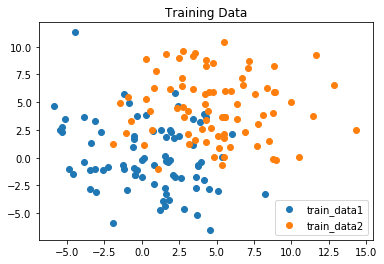

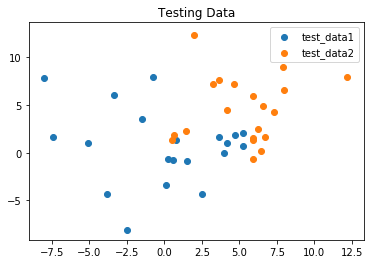

In [70]:
data1, data2 = gen_clusters(0,5,10,10)

train_data1 = data1[:80]
test_data1 = data1[80:100]
train_data2 = data2[:80]
test_data2 = data2[80:100]

train_data = np.append(train_data1, train_data2,0)
test_data = np.append(test_data1, test_data2,0)

train_y = np.append(np.ones(80), np.ones(80)*(-1.0))
test_y = np.append(np.ones(20), np.ones(20)*(-1.0))

plt.title('Training Data')
plt.scatter(train_data1[:,0],train_data1[:,1], label='train_data1')
plt.scatter(train_data2[:,0],train_data2[:,1], label='train_data2')
plt.legend()
plt.show()
plt.title('Testing Data')
plt.scatter(test_data1[:,0],test_data1[:,1], label='test_data1')
plt.scatter(test_data2[:,0],test_data2[:,1], label='test_data2')
plt.legend()
plt.show()

**Analysis**: In the figure shown below, the green points means the test data which are correctly predicted. From this accuracy, it can be seen that the accuracy is much lower if the means of the two Gaussians are too close.

Accuracy:67.5%


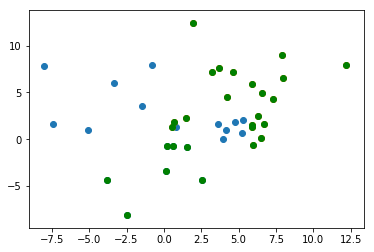

In [71]:
p = Perceptron(2)
p.train(train_data,train_y)

correct_counter = 0
correct_points = []
for i in range(len(test_data)):
    predict_label = p.forward(test_data[i])
    if test_y[i] == predict_label:
        correct_counter += 1
        correct_points.append(test_data[i])

rate = correct_counter / len(test_data)
print("Accuracy:"+str(rate*100)+"%")

plt.scatter(test_data1[:,0],test_data1[:,1])
plt.scatter(test_data2[:,0],test_data2[:,1])
for i in correct_points:
    plt.scatter(i[0],i[1],color='green')

#### 2. If the variance  of the two Gaussians are too high:


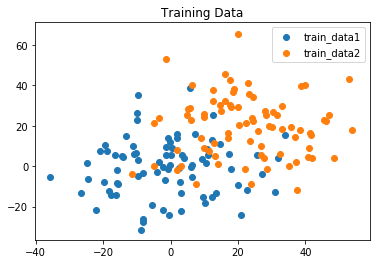

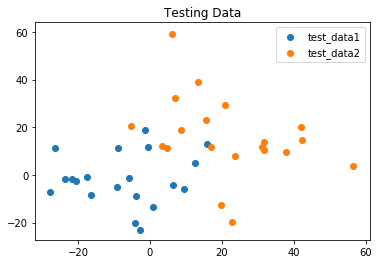

In [76]:
data1, data2 = gen_clusters(0,20,200,200)

train_data1 = data1[:80]
test_data1 = data1[80:100]
train_data2 = data2[:80]
test_data2 = data2[80:100]

train_data = np.append(train_data1, train_data2,0)
test_data = np.append(test_data1, test_data2,0)

train_y = np.append(np.ones(80), np.ones(80)*(-1.0))
test_y = np.append(np.ones(20), np.ones(20)*(-1.0))

plt.title('Training Data')
plt.scatter(train_data1[:,0],train_data1[:,1], label='train_data1')
plt.scatter(train_data2[:,0],train_data2[:,1], label='train_data2')
plt.legend()
plt.show()
plt.title('Testing Data')
plt.scatter(test_data1[:,0],test_data1[:,1], label='test_data1')
plt.scatter(test_data2[:,0],test_data2[:,1], label='test_data2')
plt.legend()
plt.show()

**Analysis**: In the figure shown below, the green points means the test data which are correctly predicted. From this accuracy, it can be seen that the accuracy is much lower if the variances of the two Gaussians are too high.

Accuracy:62.5%


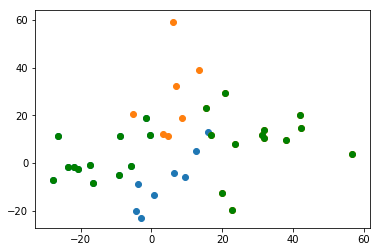

In [77]:
p = Perceptron(2)
p.train(train_data,train_y)

correct_counter = 0
correct_points = []
for i in range(len(test_data)):
    predict_label = p.forward(test_data[i])
    if test_y[i] == predict_label:
        correct_counter += 1
        correct_points.append(test_data[i])

rate = correct_counter / len(test_data)
print("Accuracy:"+str(rate*100)+"%")

plt.scatter(test_data1[:,0],test_data1[:,1])
plt.scatter(test_data2[:,0],test_data2[:,1])
for i in correct_points:
    plt.scatter(i[0],i[1],color='green')